# 0.0 Imports

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## 0.1 Load Data

In [7]:
df_raw = pd.read_csv('../data/01_raw/df_ready.csv')

In [8]:
df_raw = df_raw.drop(columns={  'Unnamed: 0', 'Date_imp', 'Cluster', 'condition', 'sourceURLs', 'Date_imp_d.1', 
                                'Zscore_1', 'price_std', 'imageURLs', 'shipping', 'weight', 'currency'})

In [9]:
df_raw.head()

,Date_imp_d,Category_name,name,price,disc_price,merchant,Disc_percentage,isSale,Imp_count,brand,p_description,dateAdded,dateSeen,dateUpdated,manufacturer,Day_n,month,month_n,day,Week_Number
0,2017/12/14,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.00,64.99,Walmart.com,0.06,Yes,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-12-14T06:00:00Z,2018-06-13T19:39:02Z,Boytone,Thursday,12,December,14,50
1,2017/09/08,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.00,69.00,Walmart.com,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-09-08T05:00:00Z,2018-06-13T19:39:02Z,Boytone,Friday,9,September,8,36
2,2017/10/24,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,66.00,66.00,Walmart.com,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-10-24T04:00:00Z,2018-06-13T19:39:02Z,Boytone,Tuesday,10,October,24,43
3,2017/08/15,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,74.99,74.99,Walmart.com,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-08-15T15:00:00Z,2018-06-13T19:39:02Z,Boytone,Tuesday,8,August,15,33
4,2017/09/14,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.99,69.99,Walmart.com,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-09-14T21:00:00Z,2018-06-13T19:39:02Z,Boytone,Thursday,9,September,14,37


# 1.0 Descrição dos dados

In [10]:
df1 = df_raw.copy()

## 1.1 Rename Columns

In [11]:
cols_name = ['date_imp', 'category_name', 'name', 'price', 'disc_price',
       'merchant', 'disc_percentage', 'is_sale', 'imp_count', 'brand',
       'p_description', 'dateadded', 'dateseen', 'dateupdated', 'manufacturer',
       'day_n', 'month', 'month_n', 'day', 'week_number']
df1.columns = cols_name

## 1.2 Data Dimension

In [12]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of cols: {df1.shape[1]}')

Number of rows: 23151
Number of cols: 20


## 1.3 Data types

In [13]:
df1.dtypes

date_imp            object
category_name       object
name                object
price              float64
disc_price         float64
merchant            object
disc_percentage    float64
is_sale             object
imp_count            int64
brand               object
p_description       object
dateadded           object
dateseen            object
dateupdated         object
manufacturer        object
day_n               object
month                int64
month_n             object
day                  int64
week_number          int64
dtype: object

## 1.4 Check NA

In [14]:
df1.isna().sum()

date_imp               0
category_name          0
name                   0
price                  0
disc_price             0
merchant               0
disc_percentage        0
is_sale                0
imp_count              0
brand                  0
p_description          0
dateadded              0
dateseen               0
dateupdated            0
manufacturer       10639
day_n                  0
month                  0
month_n                0
day                    0
week_number            0
dtype: int64

## 1.5 Change Types

In [15]:
df1['date_imp'] = pd.to_datetime( df1['date_imp'])

## 1.7 Descriptive Statistics

In [16]:
num_attributes = df1.select_dtypes( include=['float64', 'int64'])
cat_attributes = df1.select_dtypes( exclude=['float64', 'int64', 'datetime64[ns]'])

## 1.7.1 Numerical attributes

In [17]:
# central tendency
ct1 = pd.DataFrame(num_attributes.apply(np.mean) ).T   # média
ct2 = pd.DataFrame(num_attributes.apply(np.median) ).T  # mediana

# dispersion
d1 = pd.DataFrame(num_attributes.apply(np.std) ).T # Desvio padrão
d2 = pd.DataFrame(num_attributes.apply(min) ).T # valor mínimo
d3 = pd.DataFrame(num_attributes.apply(max) ).T # valor máximo
d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min())).T # Variação entre o mínimo e máxilo valor
d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew())).T #skewness
d6 = pd.DataFrame(num_attributes.apply( lambda x : x.kurtosis())).T # kurtosis

m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['att', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurt']
m

,att,min,max,range,mean,median,std,skew,kurt
0,price,1.0,10879.95,10878.95,513.037803,199.99,859.091448,4.595160,34.411146
1,disc_price,1.0,10879.95,10878.95,494.104295,199.00,808.571509,4.748349,39.612839
2,disc_percentage,0.0,0.80,0.80,0.016933,0.00,0.077847,5.217632,28.754920
3,imp_count,1.0,31.00,30.00,6.560926,5.00,5.403049,1.286351,1.639569
4,month,1.0,12.00,11.00,7.651030,8.00,2.592787,-0.099417,-0.628859
5,day,1.0,31.00,30.00,15.693879,16.00,9.681413,0.032258,-1.331838
6,week_number,1.0,51.00,50.00,31.342750,32.00,11.316253,-0.266980,-0.648027


# 2.0 EDA

In [18]:
df2 = df1.copy()

## 2.1 Qual o merchant que mais vendeu?

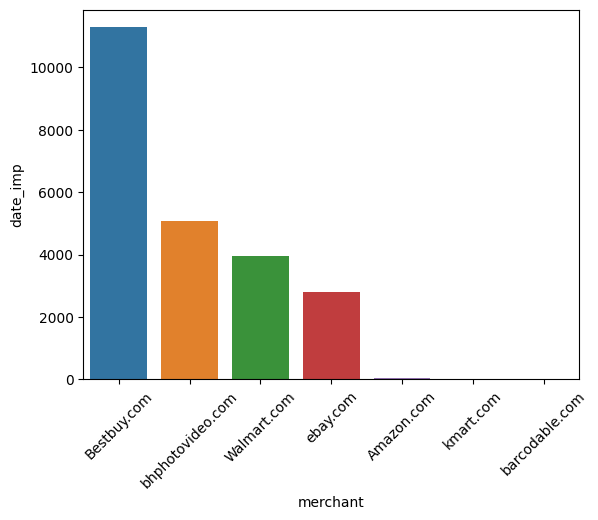

In [26]:
aux1 = df2[['date_imp', 'merchant']].groupby('merchant').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='merchant', y='date_imp', data=aux1)
plt.xticks(rotation=45);

In [27]:
# Seleção das lojas
df_best = df2[df2['merchant'] == 'Bestbuy.com']
df_bhp = df2[df2['merchant'] == 'bhphotovideo.com']
df_walmart = df2[df2['merchant'] == 'Walmart.com']
df_ebay = df2[df2['merchant'] == 'ebay.com']

## 2.2 Qual a categoria mais vendida?

### 2.2.1 Categorias mais vendidas no geral

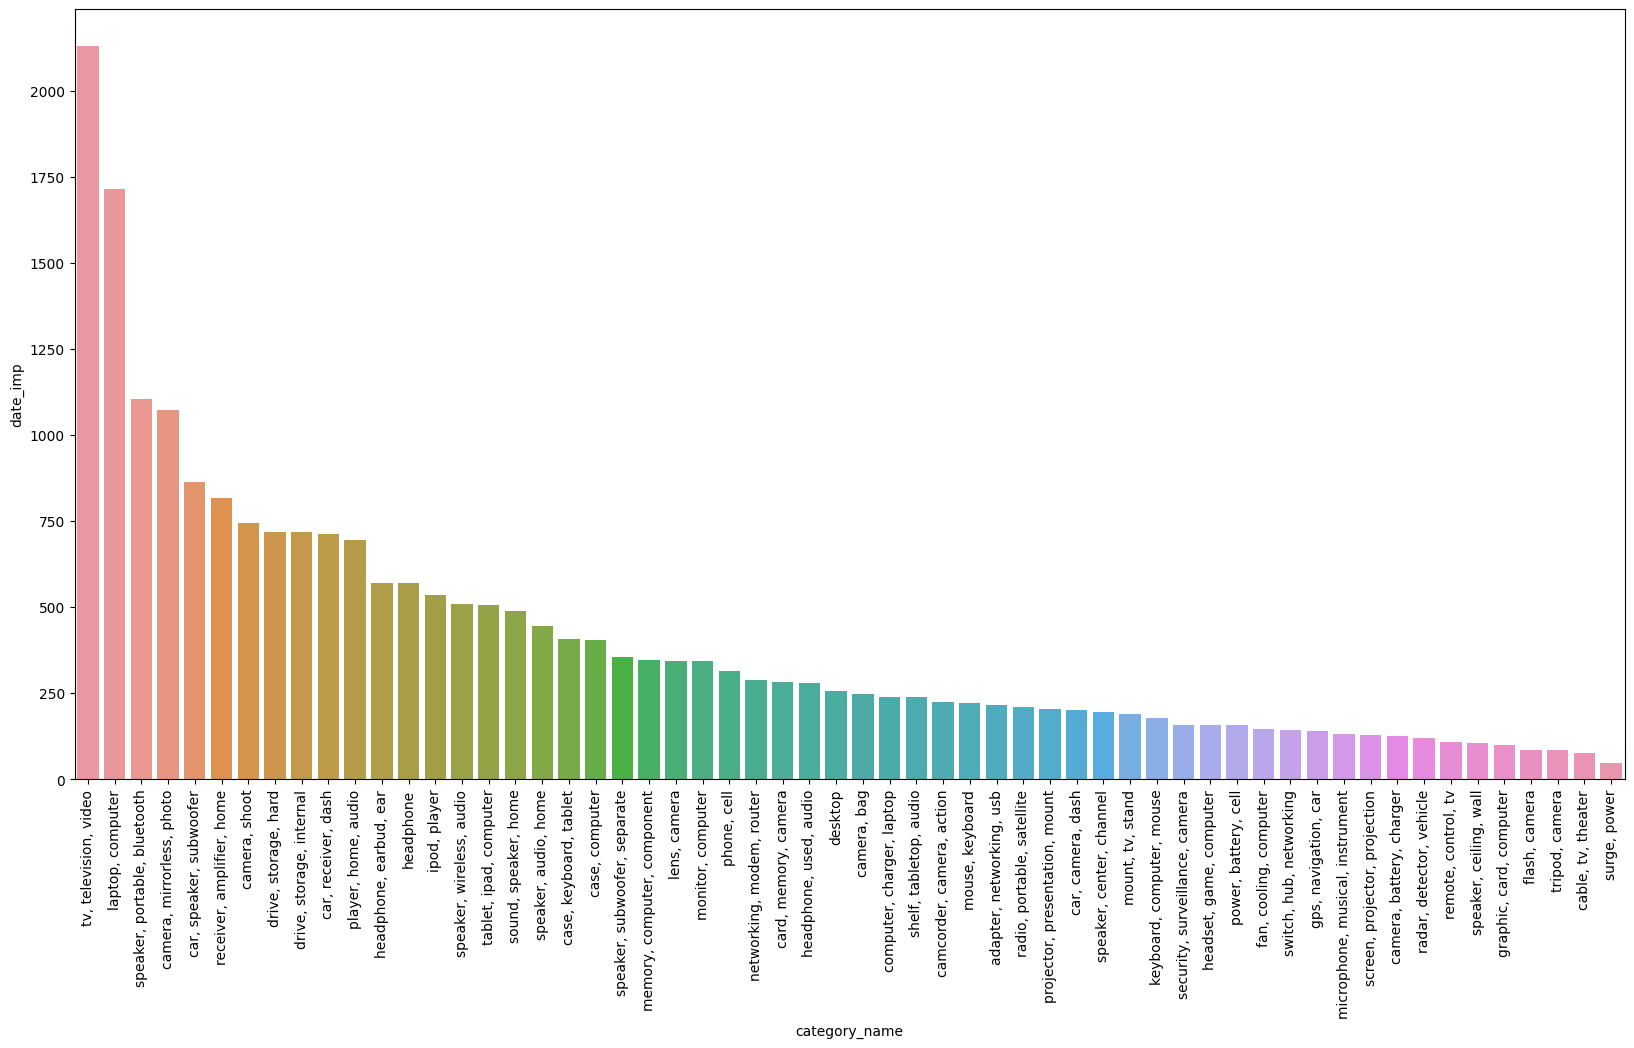

In [33]:
aux2 = df2[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.figure(figsize=(20, 10))
sns.barplot(x='category_name', y='date_imp', data=aux2)
plt.xticks(rotation=90);

### 2.2.2 Categorias mais vendidas por lojas

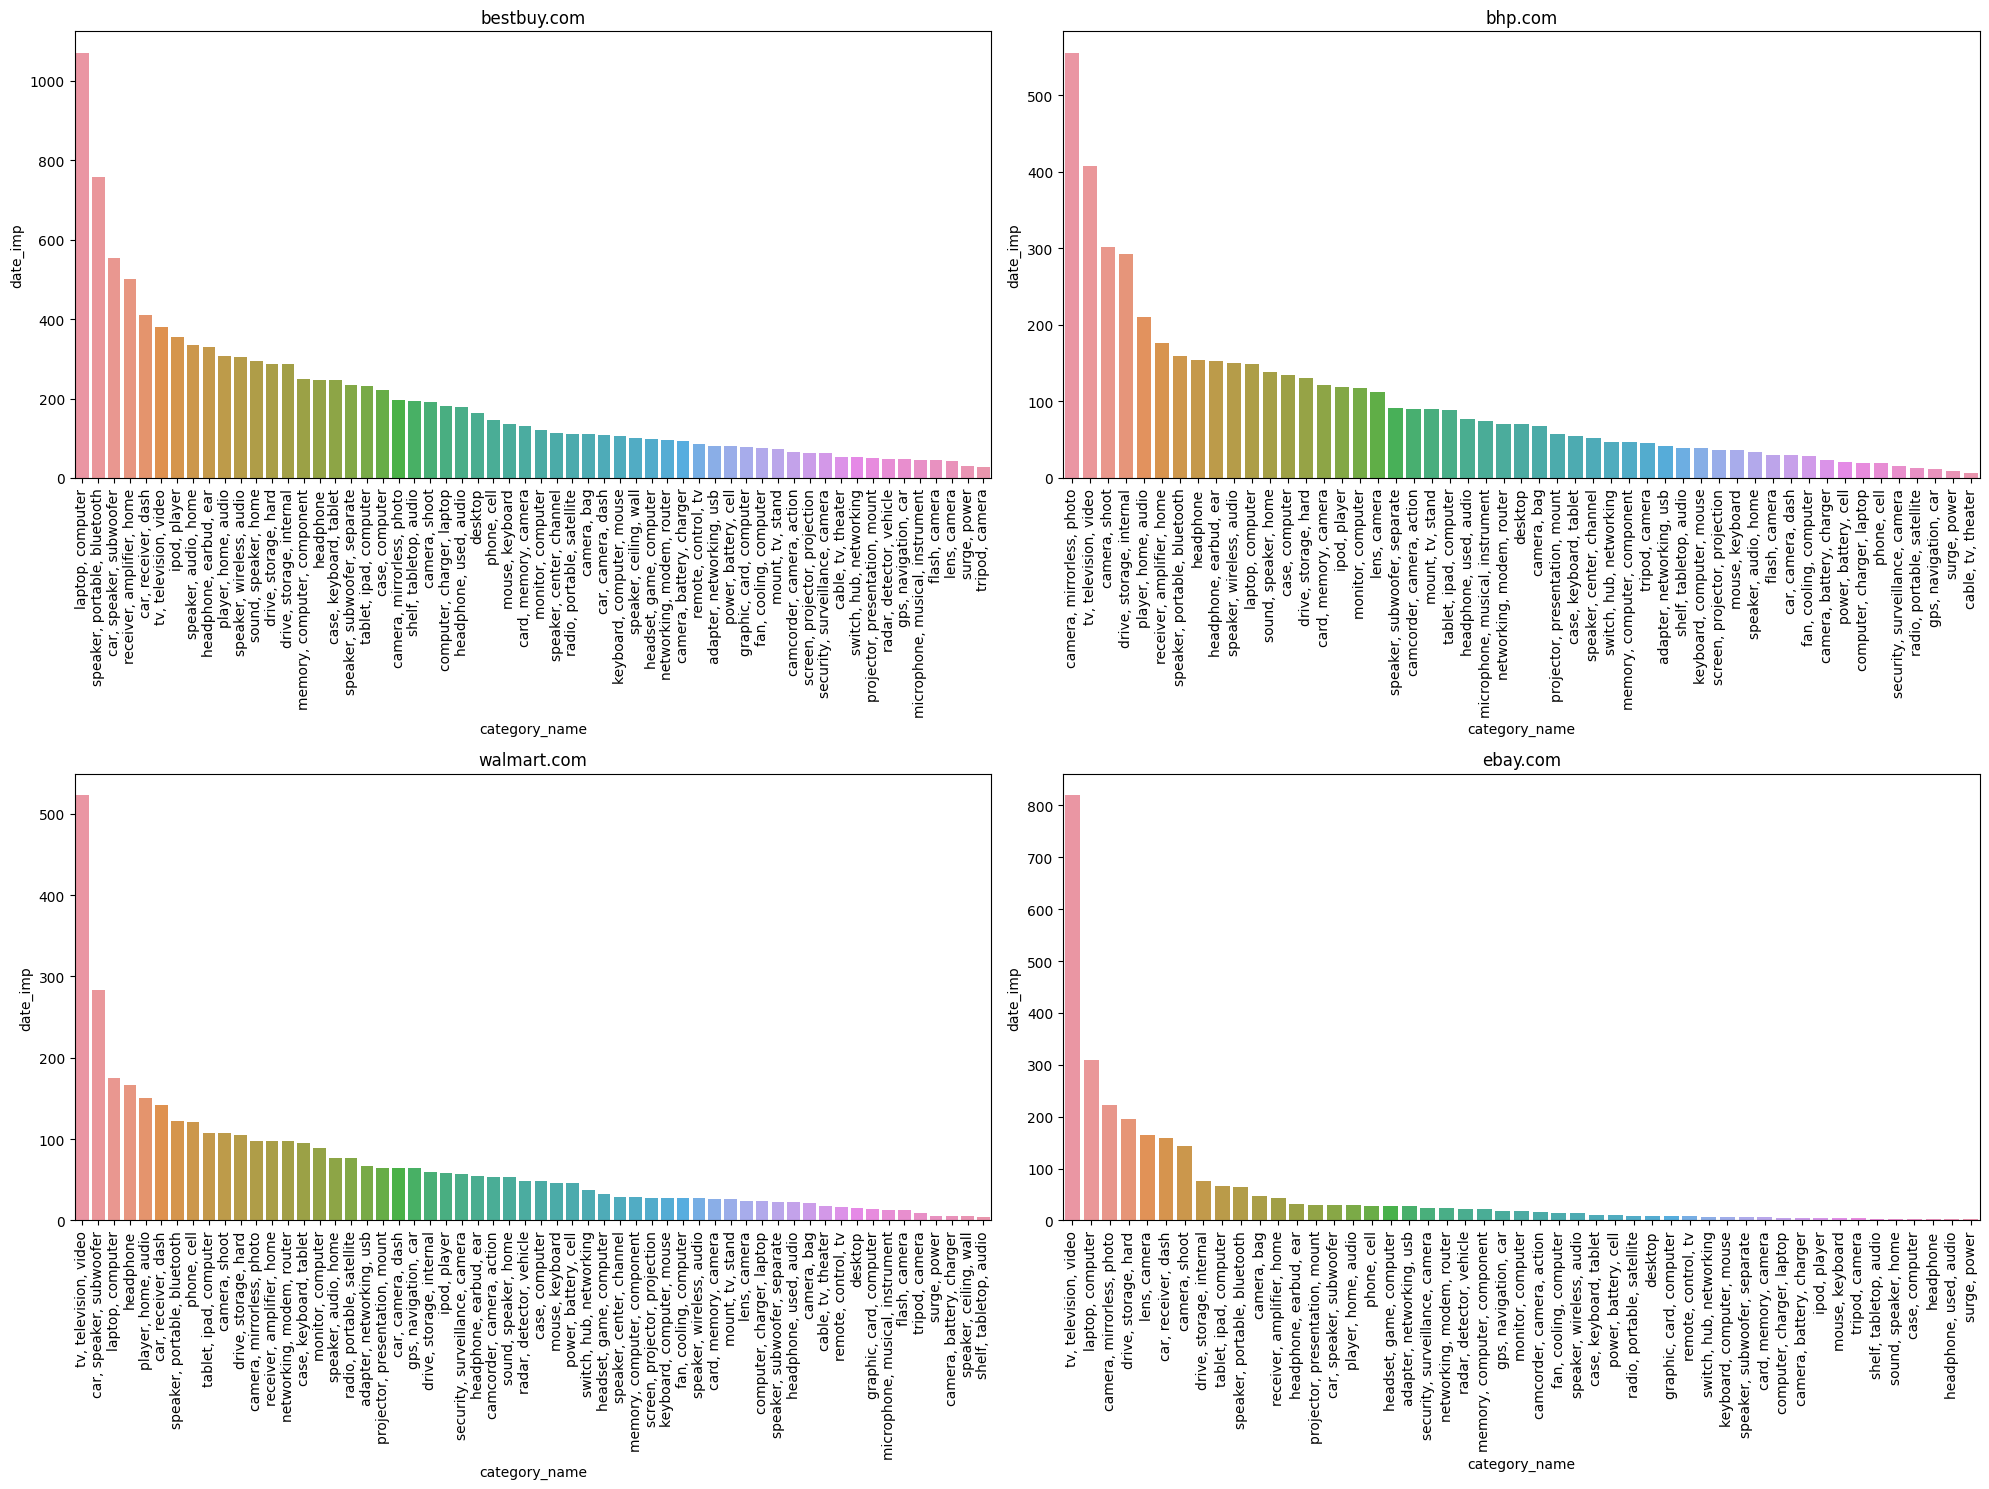

In [37]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
plt.title('bestbuy.com')
aux2 = df_best[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='category_name', y='date_imp', data=aux2)
plt.xticks(rotation=90);

plt.subplot(2, 2, 2)
plt.title('bhp.com')
aux2 = df_bhp[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='category_name', y='date_imp', data=aux2)
plt.xticks(rotation=90);

plt.subplot(2, 2, 3)
plt.title('walmart.com')
aux2 = df_walmart[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='category_name', y='date_imp', data=aux2)
plt.xticks(rotation=90);

plt.subplot(2, 2, 4)
plt.title('ebay.com')
aux2 = df_ebay[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='category_name', y='date_imp', data=aux2)
plt.xticks(rotation=90)

plt.tight_layout();

## 2.3 Qual a marca mais vendida?

### 2.3.1 Qual a marca mais vendida no geral?

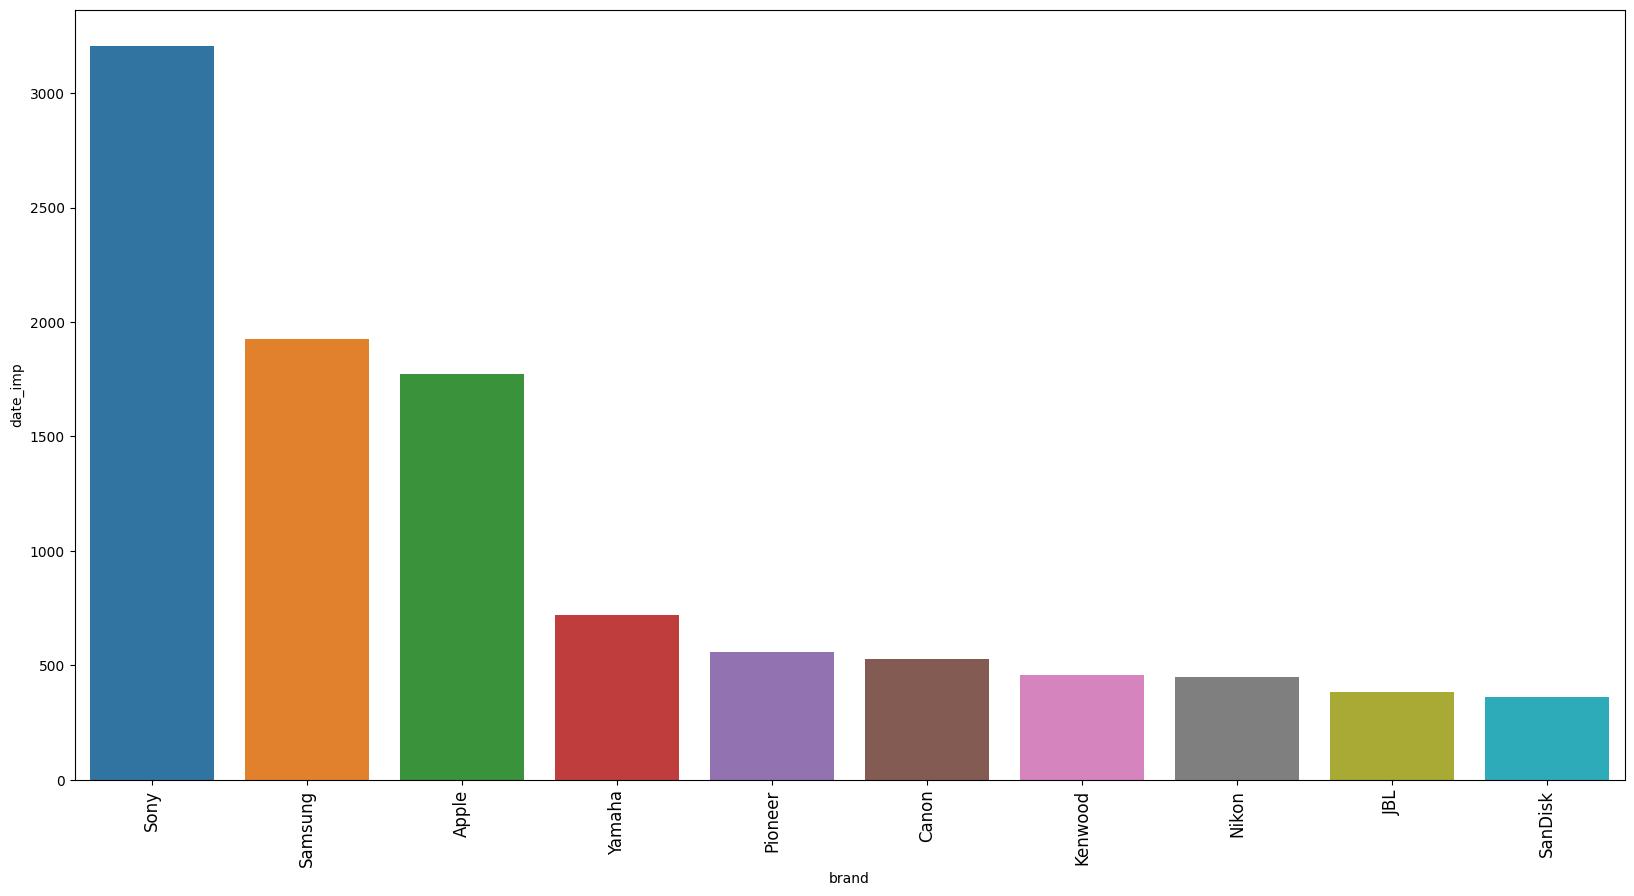

In [42]:
plt.figure(figsize=(20, 10))
aux2 = df2[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='brand', y='date_imp', data=aux2.head(10))
plt.xticks(rotation=90, fontsize=12);

### 2.3.2 Qual a marca mais vendida por loja?

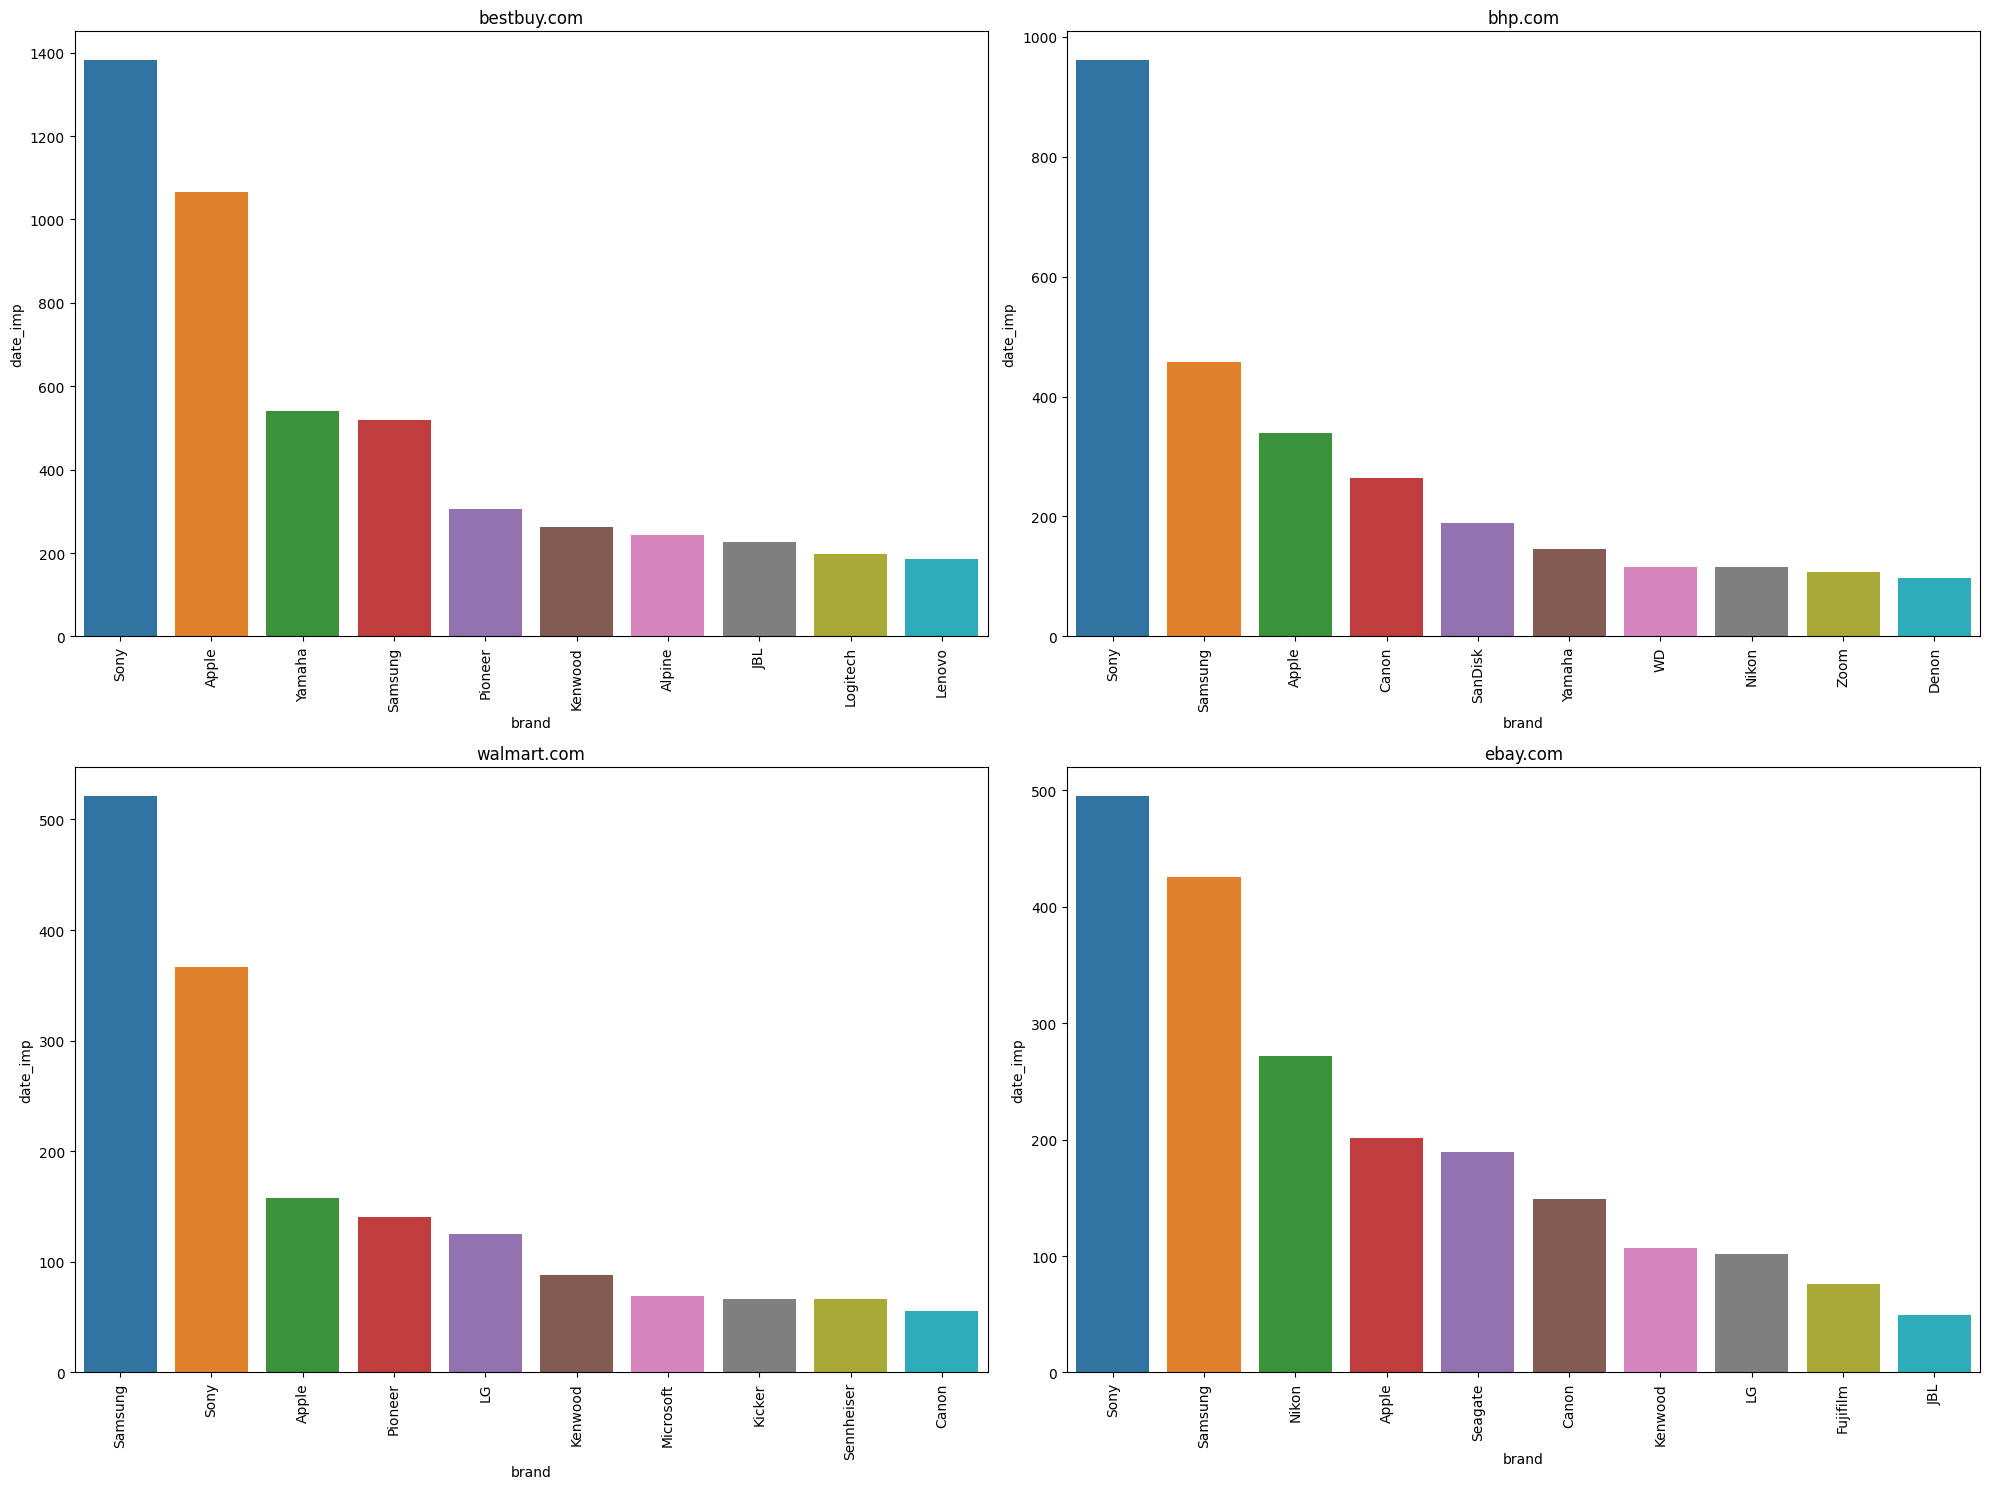

In [44]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
plt.title('bestbuy.com')
aux2 = df_best[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='brand', y='date_imp', data=aux2.head(10))
plt.xticks(rotation=90);

plt.subplot(2, 2, 2)
plt.title('bhp.com')
aux2 = df_bhp[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='brand', y='date_imp', data=aux2.head(10))
plt.xticks(rotation=90);

plt.subplot(2, 2, 3)
plt.title('walmart.com')
aux2 = df_walmart[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='brand', y='date_imp', data=aux2.head(10))
plt.xticks(rotation=90);

plt.subplot(2, 2, 4)
plt.title('ebay.com')
aux2 = df_ebay[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='brand', y='date_imp', data=aux2.head(10))
plt.xticks(rotation=90)

plt.tight_layout();

## 2.4 Quais os dias que mais vendem?

### 2.4.1 Quais os dias que mais vendem no geral?

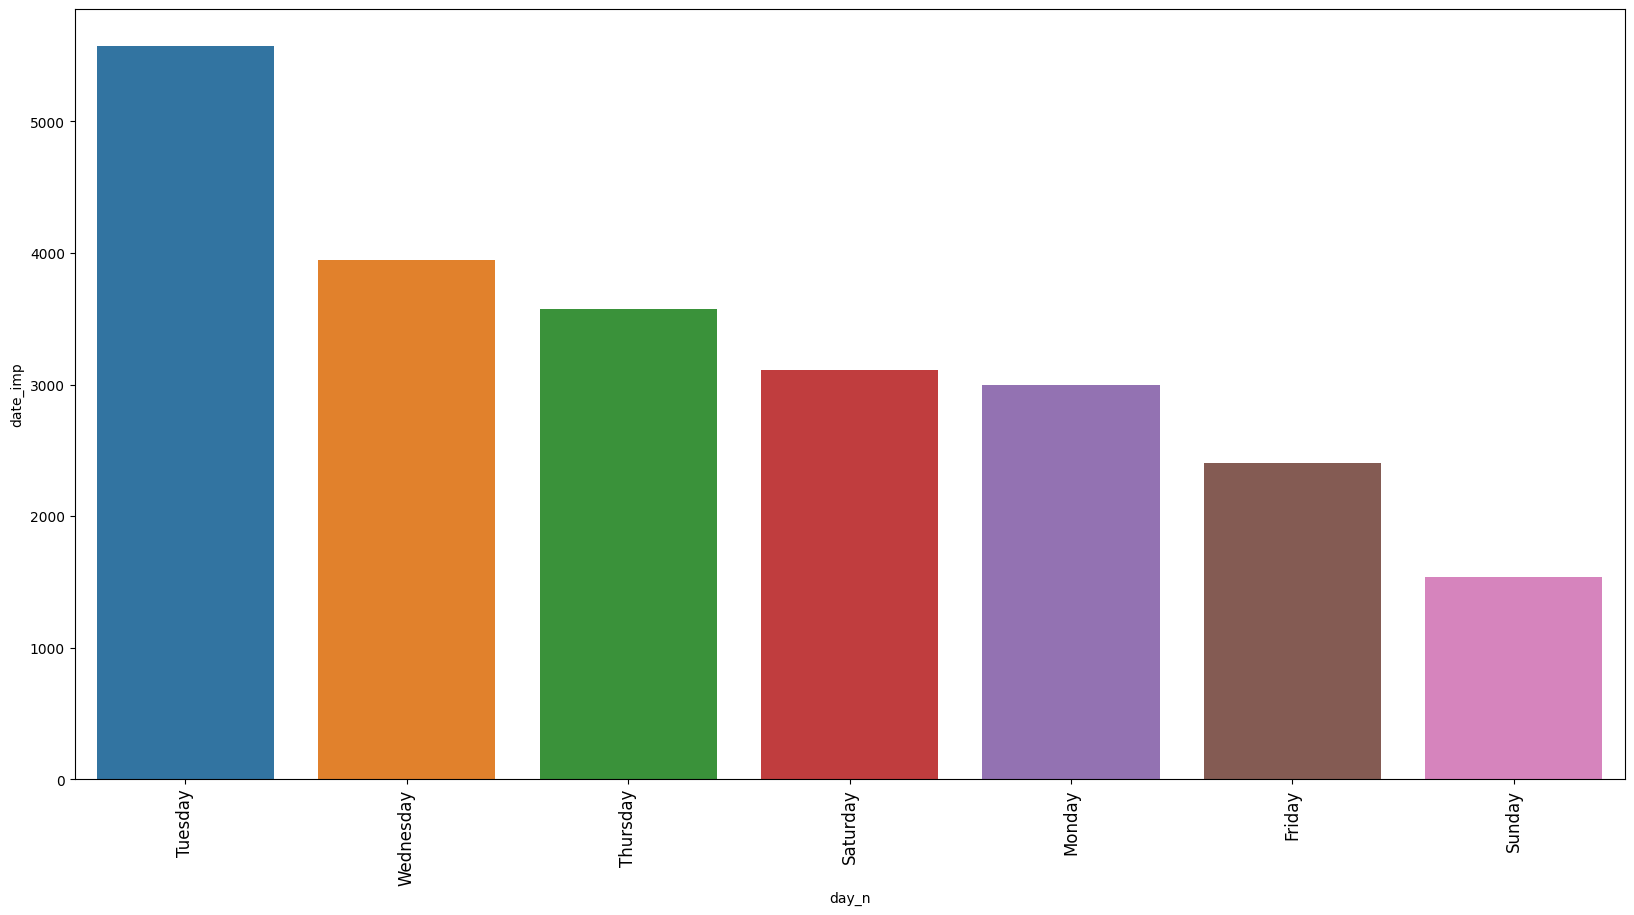

In [46]:
plt.figure(figsize=(20, 10))
aux2 = df2[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='day_n', y='date_imp', data=aux2)
plt.xticks(rotation=90, fontsize=12);

### 2.4.2 Quais os dias que mais vendem por loja?

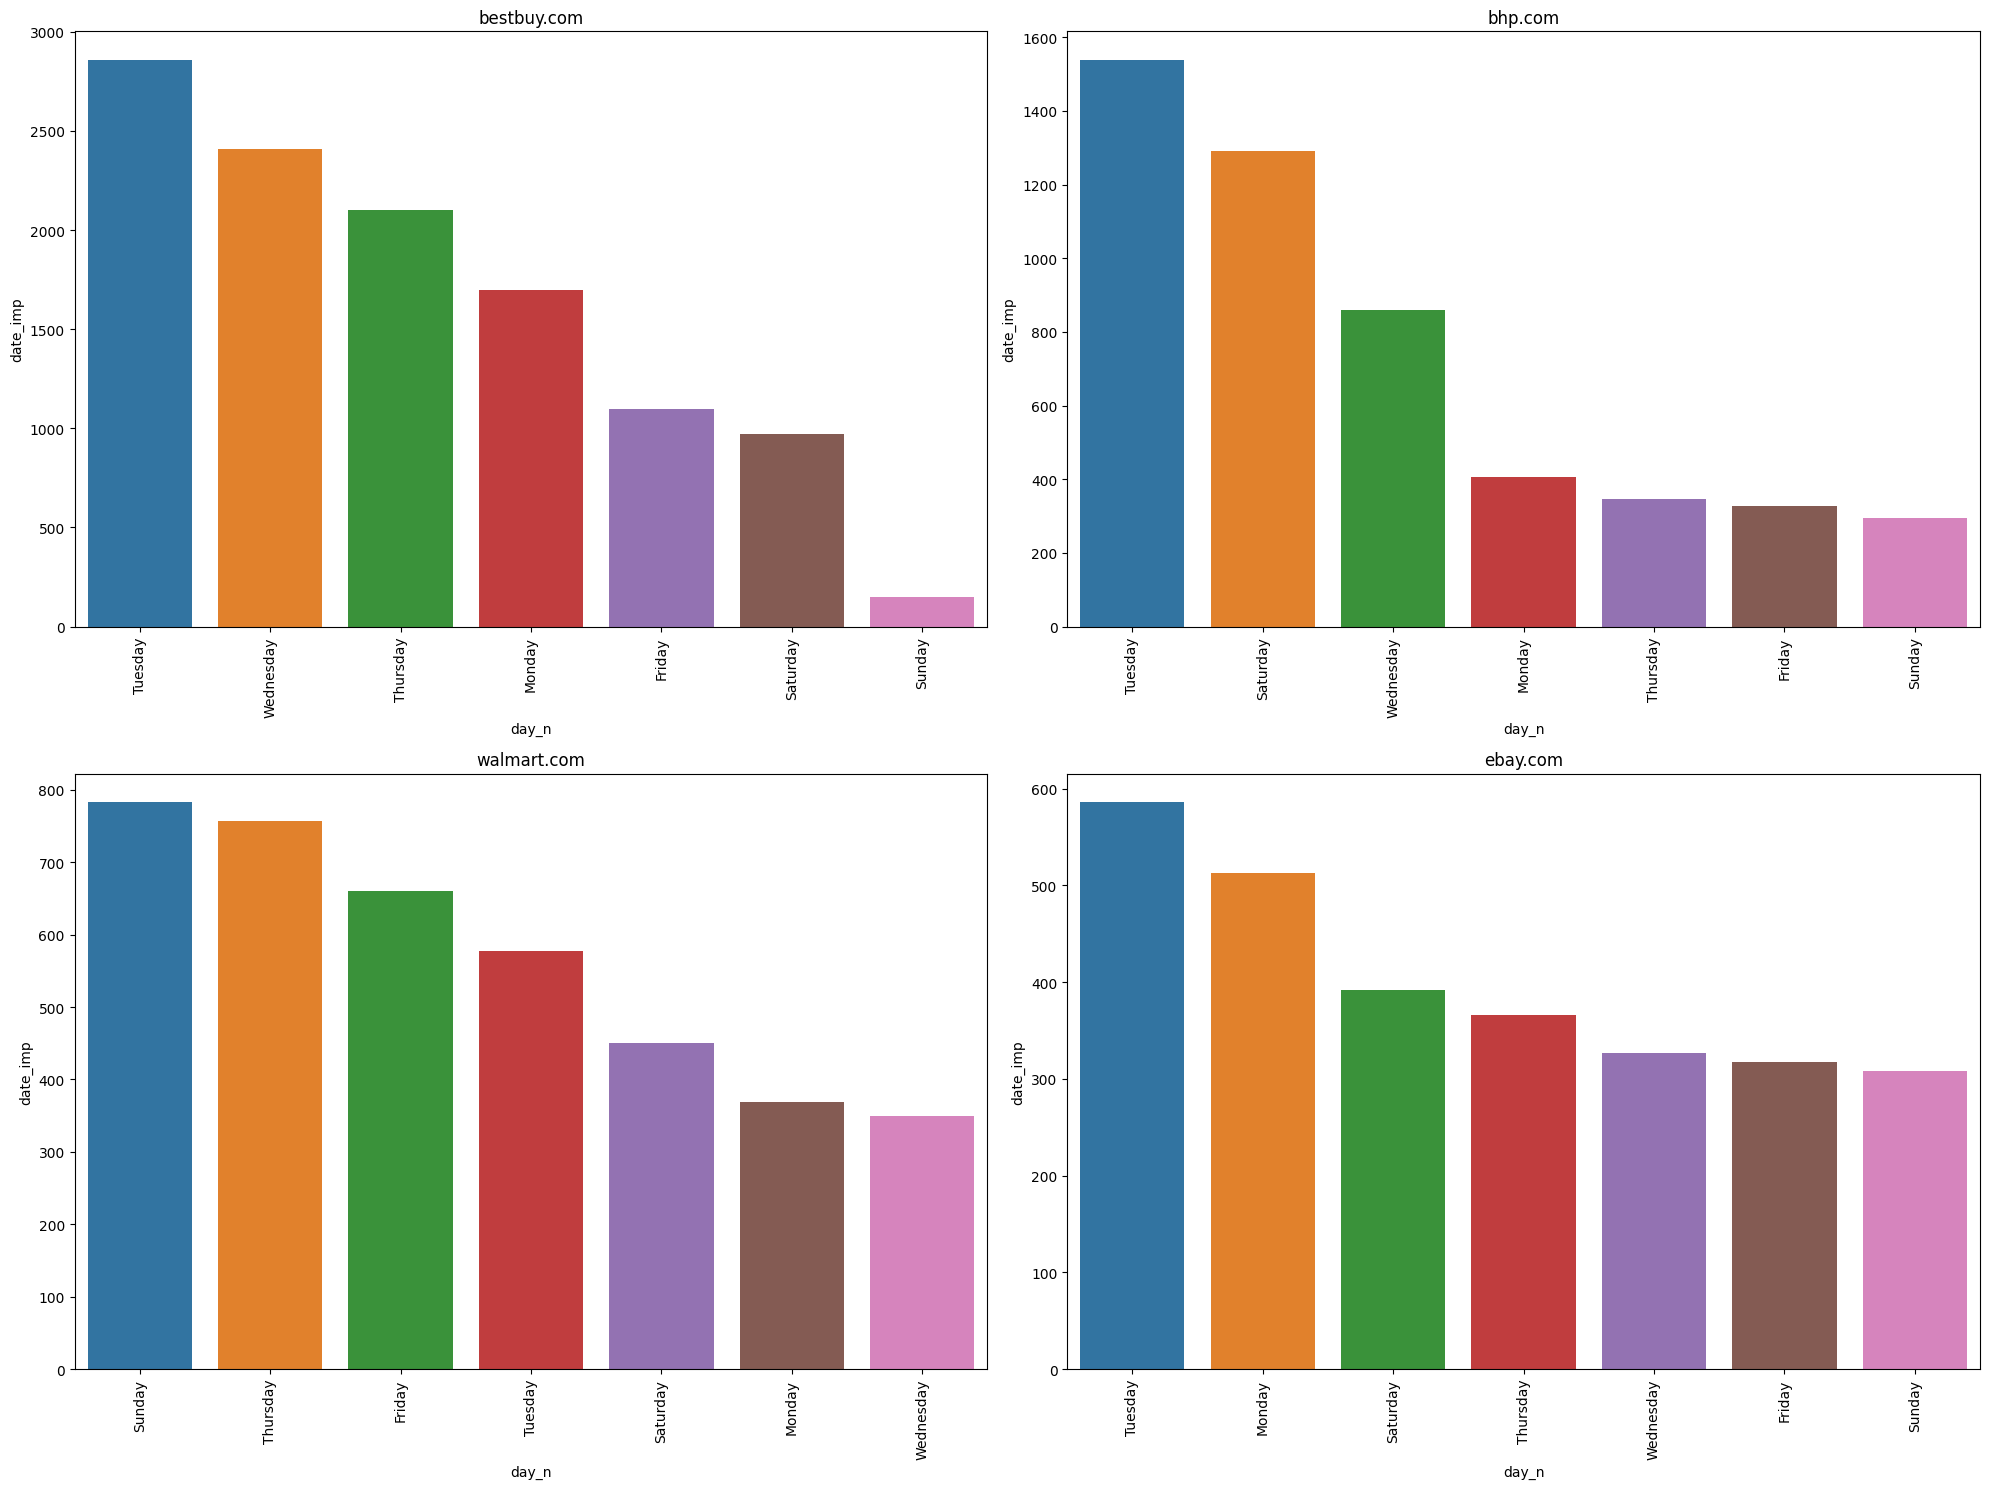

In [47]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
plt.title('bestbuy.com')
aux2 = df_best[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='day_n', y='date_imp', data=aux2)
plt.xticks(rotation=90);

plt.subplot(2, 2, 2)
plt.title('bhp.com')
aux2 = df_bhp[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='day_n', y='date_imp', data=aux2)
plt.xticks(rotation=90);

plt.subplot(2, 2, 3)
plt.title('walmart.com')
aux2 = df_walmart[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='day_n', y='date_imp', data=aux2)
plt.xticks(rotation=90);

plt.subplot(2, 2, 4)
plt.title('ebay.com')
aux2 = df_ebay[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='day_n', y='date_imp', data=aux2)
plt.xticks(rotation=90)

plt.tight_layout();

## 2.5 Quais os meses que mais vendem?

### 2.5.1 Quais os meses que mais vendem no geral?

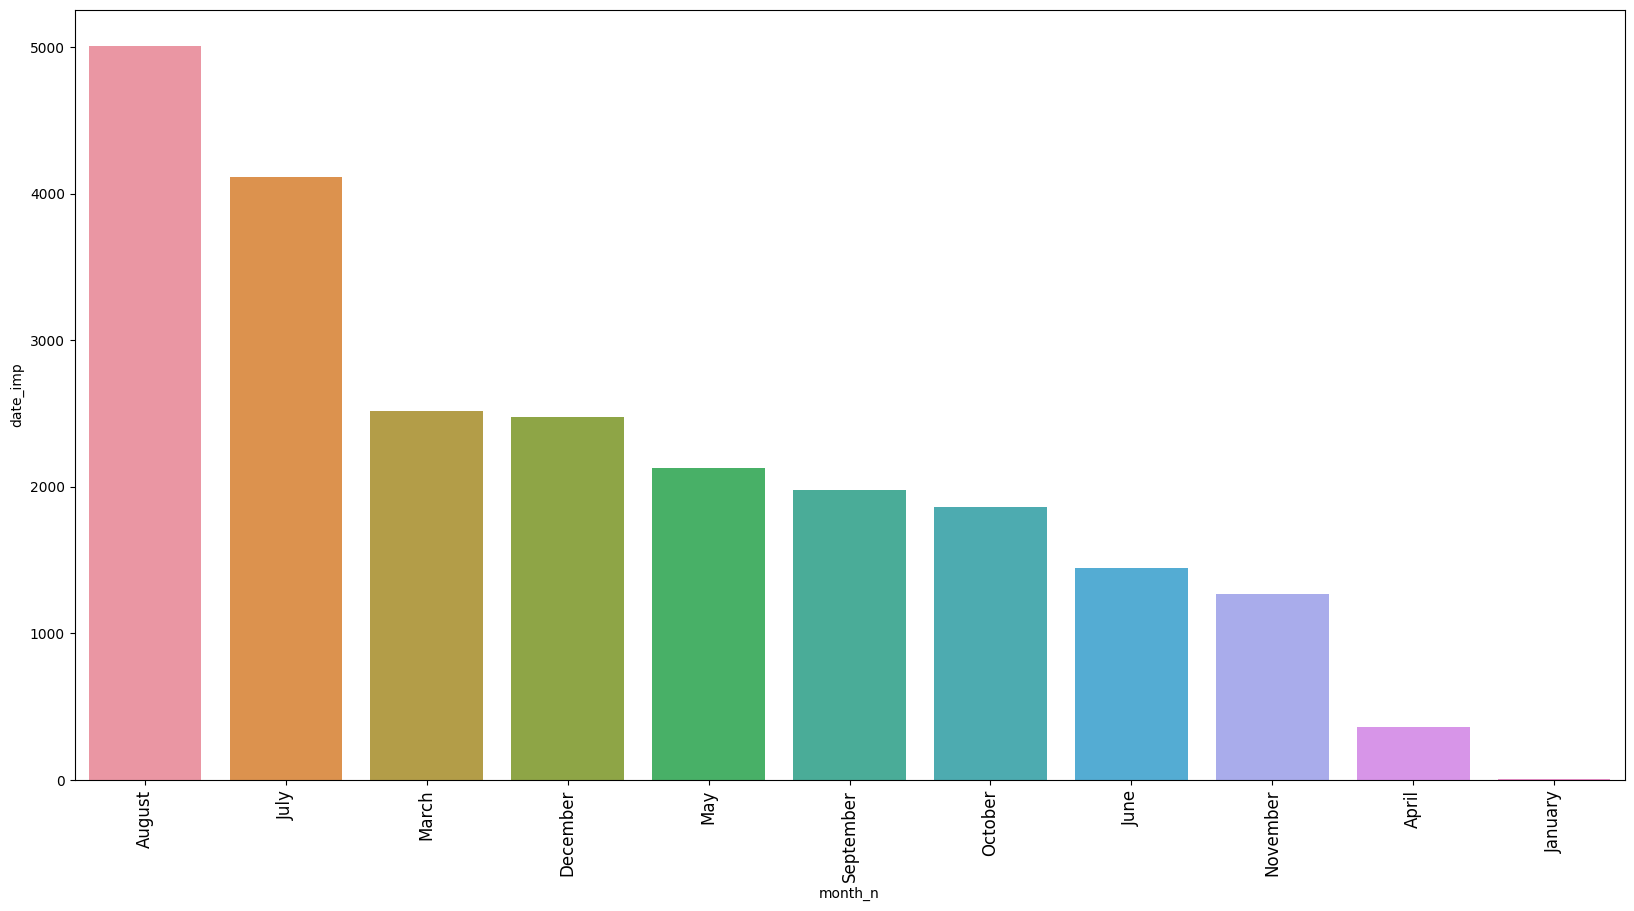

In [48]:
plt.figure(figsize=(20, 10))
aux2 = df2[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='month_n', y='date_imp', data=aux2)
plt.xticks(rotation=90, fontsize=12);

### 2.5.2 Quais os meses que mais vendem no por loja?

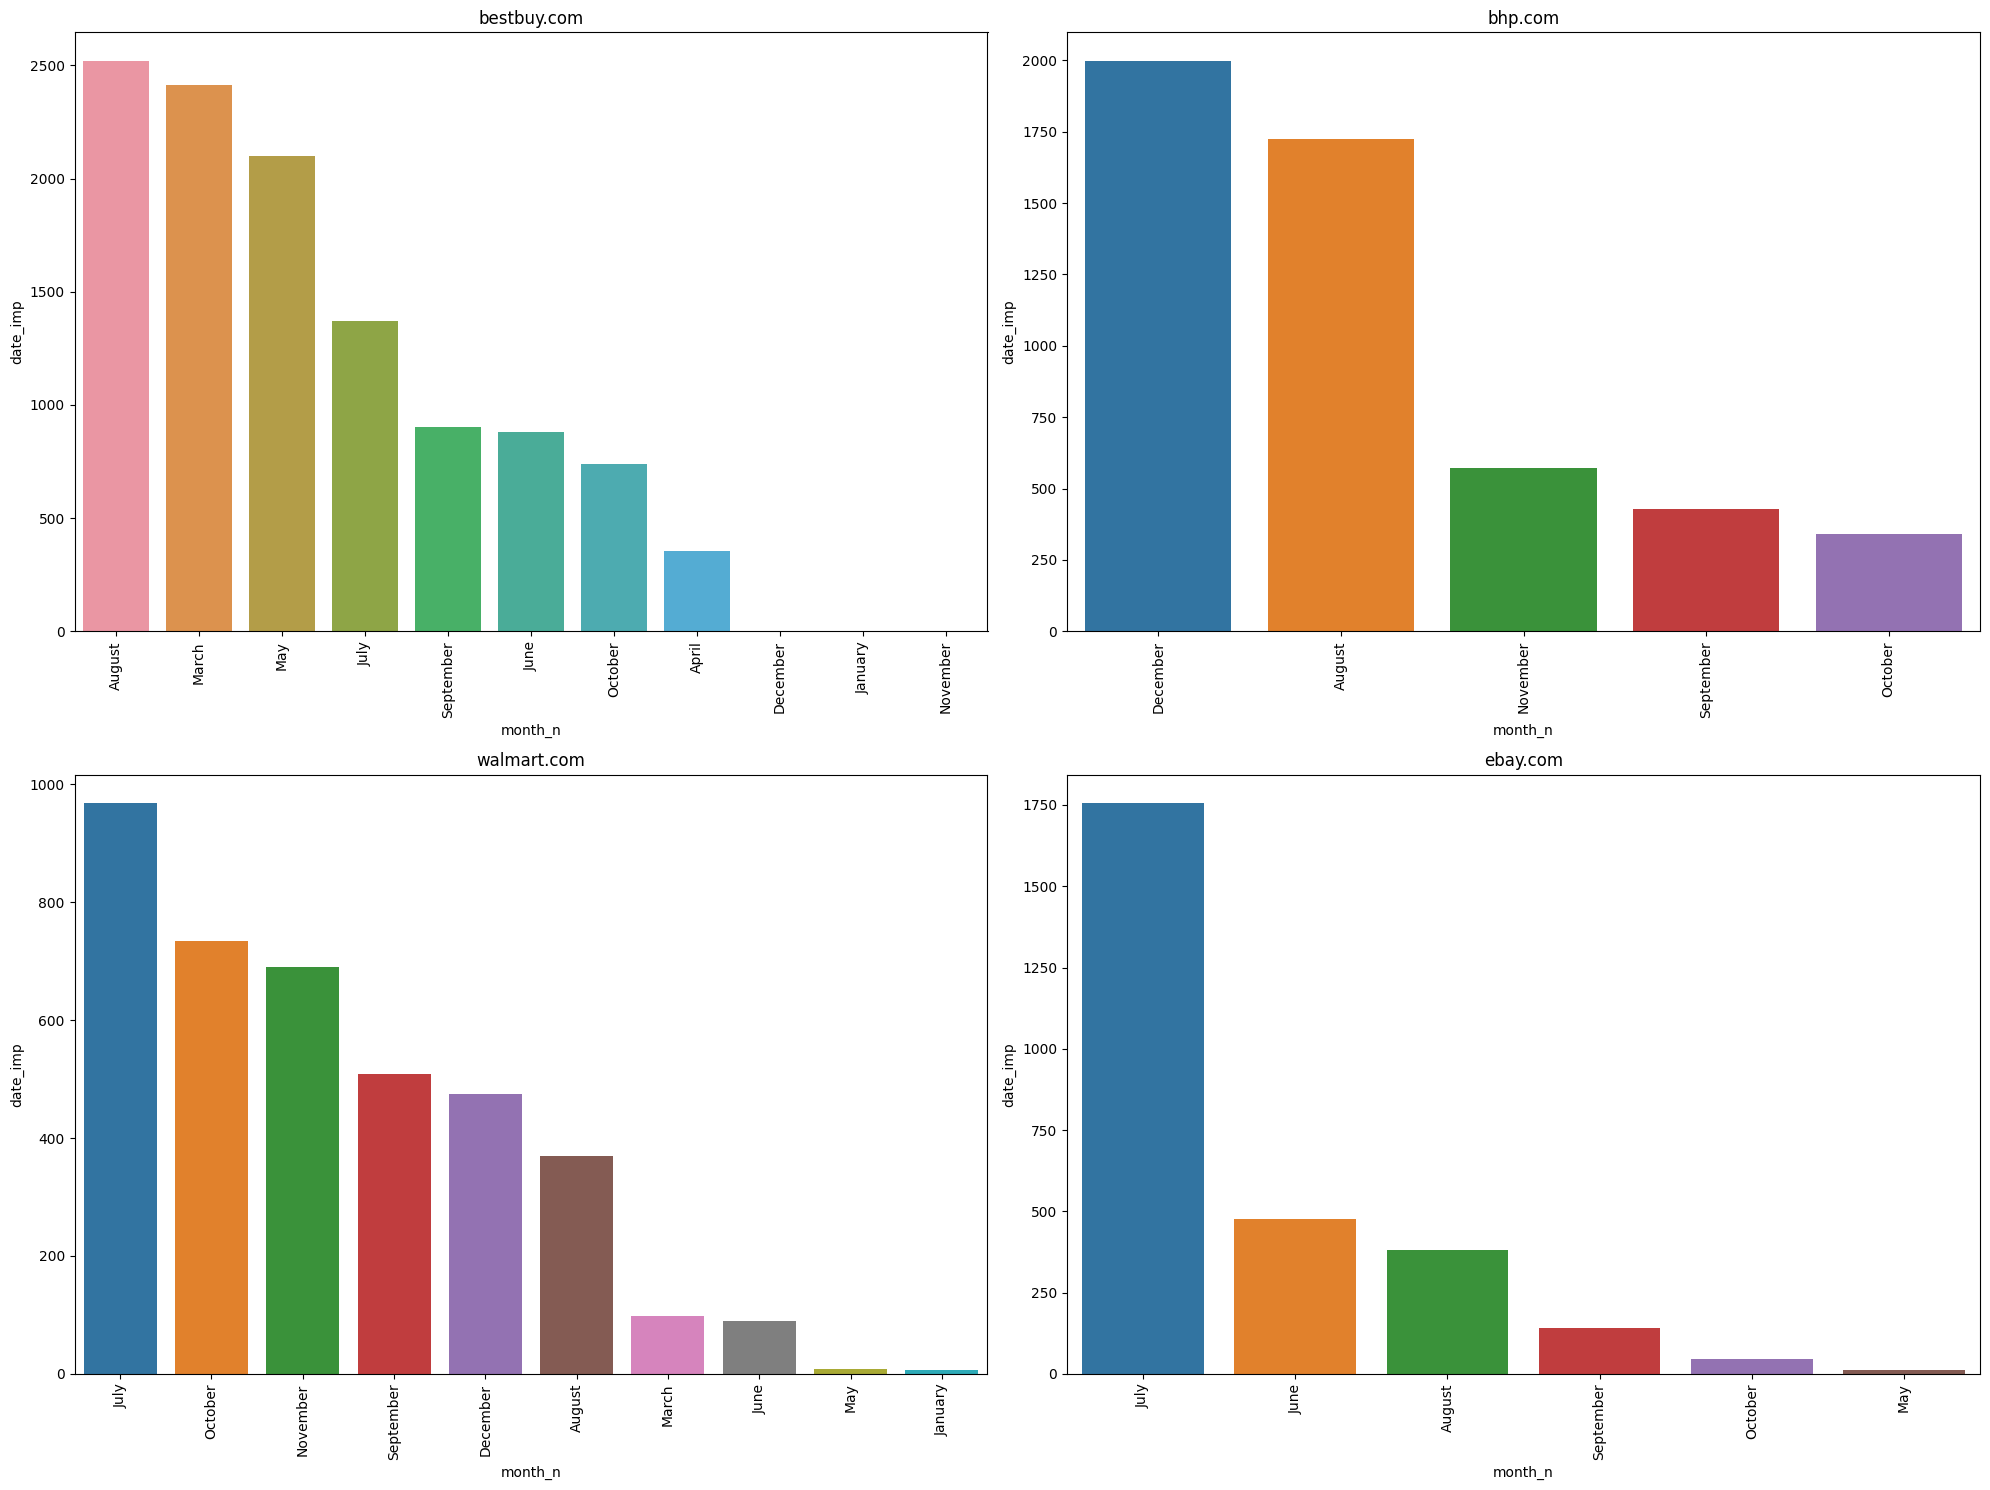

In [49]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
plt.title('bestbuy.com')
aux2 = df_best[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='month_n', y='date_imp', data=aux2)
plt.xticks(rotation=90);

plt.subplot(2, 2, 2)
plt.title('bhp.com')
aux2 = df_bhp[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='month_n', y='date_imp', data=aux2)
plt.xticks(rotation=90);

plt.subplot(2, 2, 3)
plt.title('walmart.com')
aux2 = df_walmart[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='month_n', y='date_imp', data=aux2)
plt.xticks(rotation=90);

plt.subplot(2, 2, 4)
plt.title('ebay.com')
aux2 = df_ebay[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='month_n', y='date_imp', data=aux2)
plt.xticks(rotation=90)

plt.tight_layout();

## 2.6 Quais as semanas que mais vendem?

### 2.6.1 Quais as semanas que mais vendem no geral?

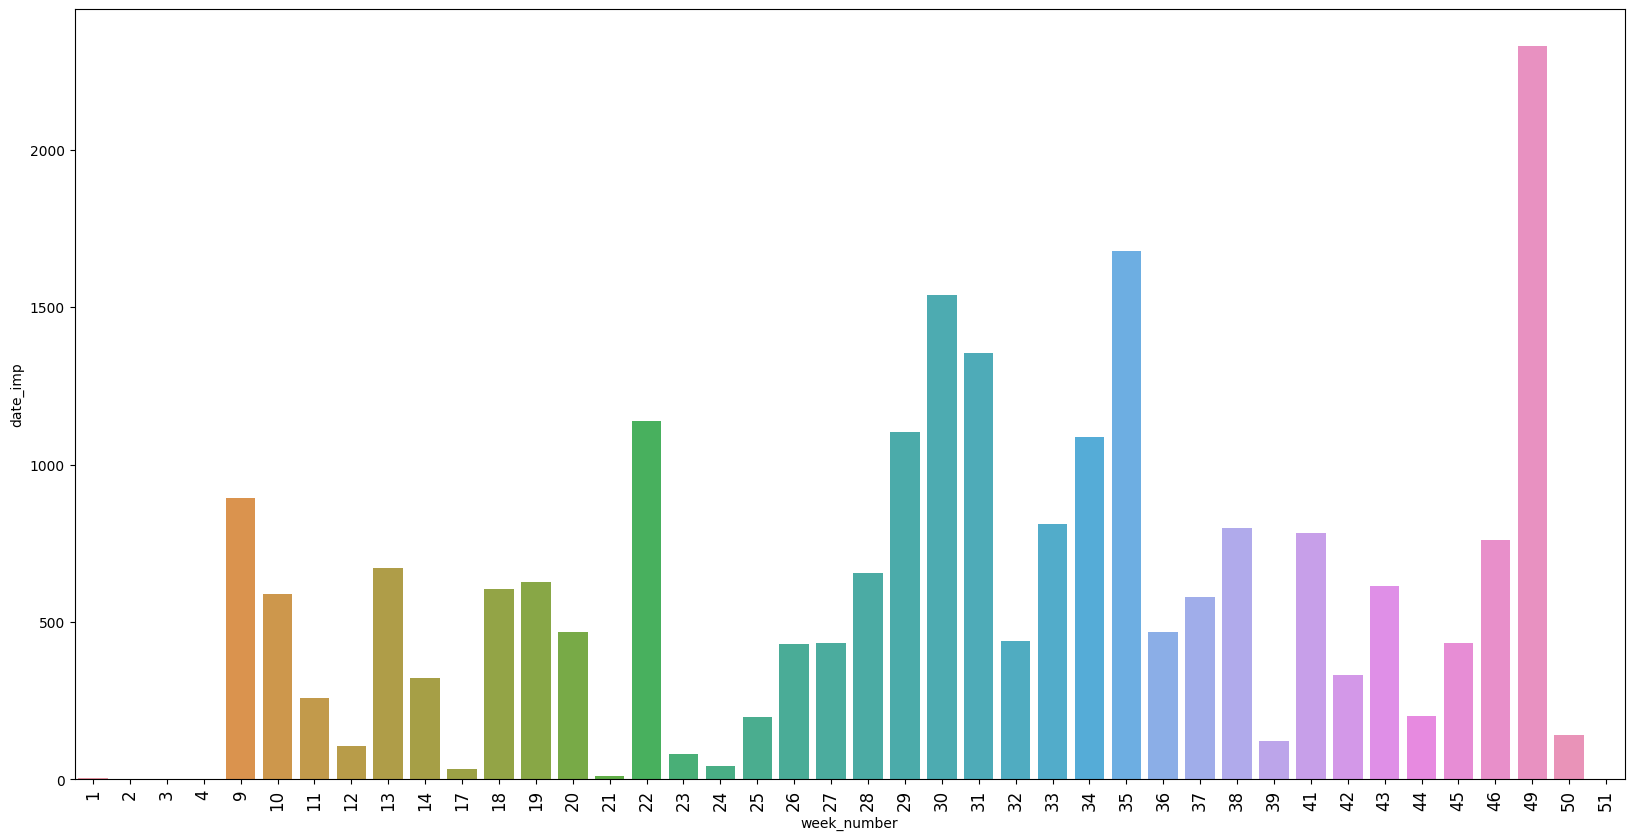

In [50]:
plt.figure(figsize=(20, 10))
aux2 = df2[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='week_number', y='date_imp', data=aux2)
plt.xticks(rotation=90, fontsize=12);

### 2.6.1 Quais as semanas que mais vendem por loja?

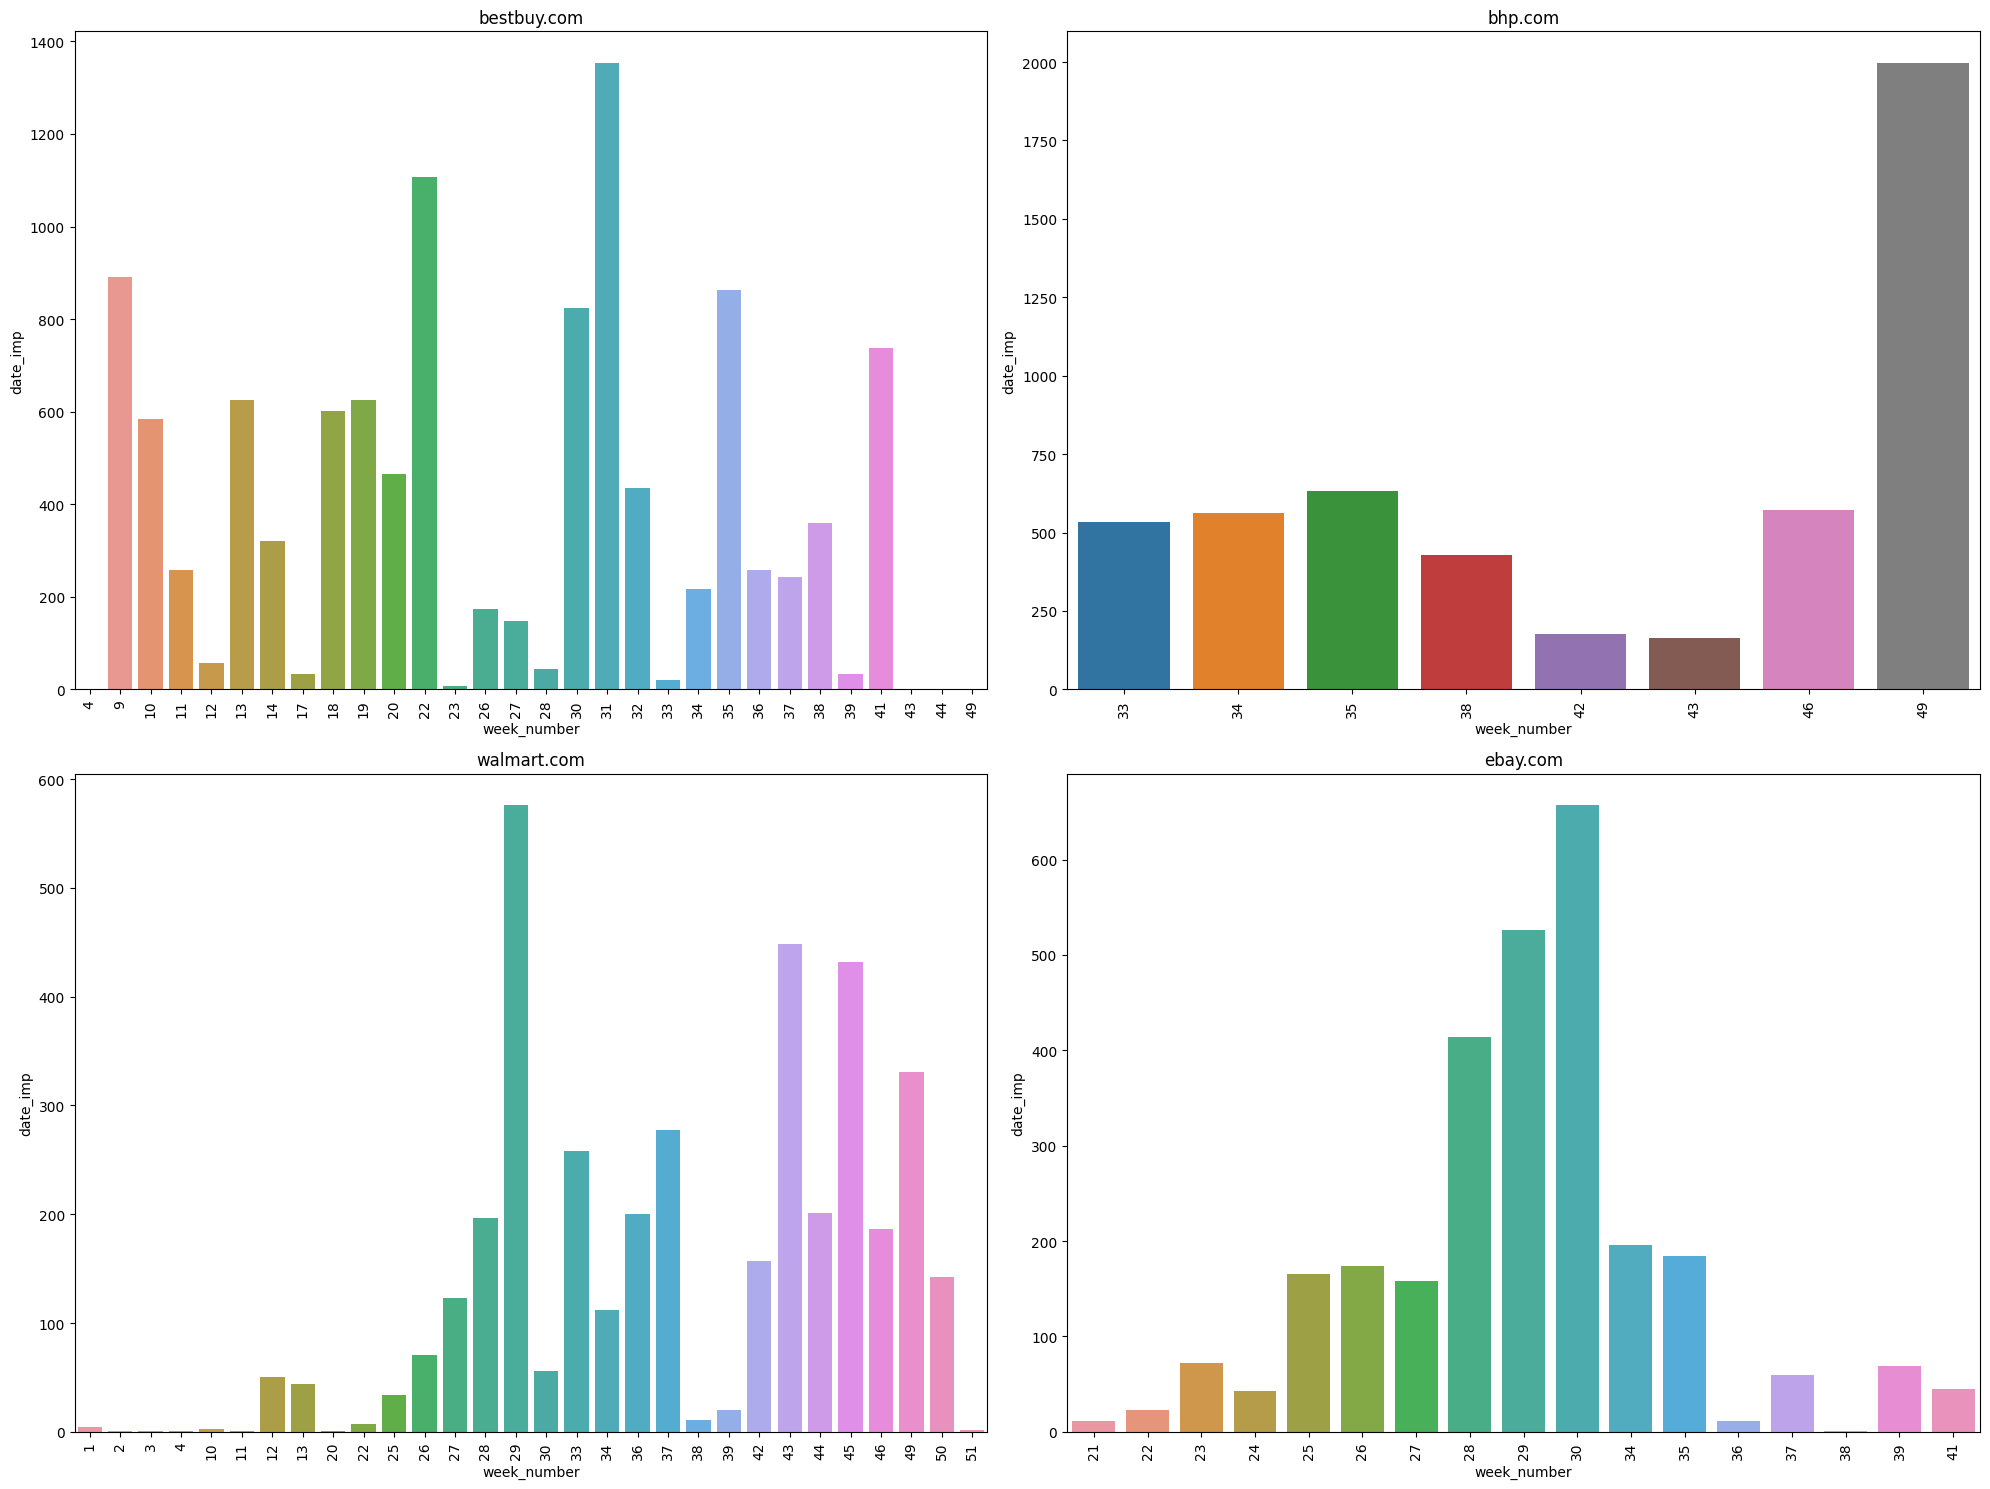

In [51]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
plt.title('bestbuy.com')
aux2 = df_best[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='week_number', y='date_imp', data=aux2)
plt.xticks(rotation=90);

plt.subplot(2, 2, 2)
plt.title('bhp.com')
aux2 = df_bhp[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='week_number', y='date_imp', data=aux2)
plt.xticks(rotation=90);

plt.subplot(2, 2, 3)
plt.title('walmart.com')
aux2 = df_walmart[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='week_number', y='date_imp', data=aux2)
plt.xticks(rotation=90);

plt.subplot(2, 2, 4)
plt.title('ebay.com')
aux2 = df_ebay[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='week_number', y='date_imp', data=aux2)
plt.xticks(rotation=90)

plt.tight_layout();